# Association Dataset

To create an association dataset, we first need to import the following:

In [1]:
from pprint import pprint

import matplotlib.pyplot as plt  # Just for visualization
import numpy as np

from netbalance.data.association_data import AData
from netbalance.visualization import draw_bipartite_graph  # Just for visualization

When creating an association dataset with `AData`, we start by specifying the node names for each group, then define the associations that link these groups.

In [2]:
cluster_a_node_names = ["A1", "A2", "A3", "A4", "A5", "A6"]
cluster_b_node_names = ["B1", "B2", "B3", "B4", "B5", "B6"]
associations = np.array(  # [index_a, index_b, positive or negative]
    [
        [0, 1, 1],
        [0, 3, 1],
        [1, 4, 1],
        [2, 0, 1],
        [2, 5, 1],
        [3, 2, 1],
        [4, 3, 1],
        [5, 4, 1],
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [1, 2, 0],
        [2, 1, 0],
        [2, 4, 0],
        [3, 3, 0],
        [4, 4, 0],
        [5, 1, 0],
        [5, 2, 0],
        [5, 5, 0],
    ]
)

data = AData(
    associations=associations,
    node_names=[
        cluster_a_node_names,
        cluster_b_node_names,
    ],
)

The following code block visualizes the defined association graph. Positive associations are shown with green edges, while negative associations are shown with red edges. The rings around each node indicate the proportion of its positive and negative associations, represented in green and red, respectively.

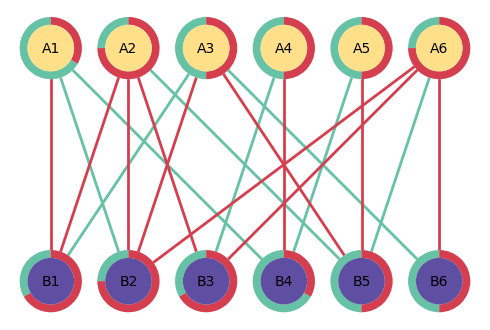

In [3]:
fig, ax = plt.subplots(figsize=(5, 6))
draw_bipartite_graph(data.associations, cluster_a_node_names, cluster_b_node_names, ax)
fig.tight_layout()

As you can see, this dataset is neither balanced nor entity-balanced.
It is not balanced because the number of negative edges is greater than the number of positive ones. It is not entity-balanced because, for many nodes, the proportion of positive and negative associations is not equal.  
We can use the `data.get_stats()` function to retrieve useful information about our dataset:


In [4]:
pprint(data.get_stats())

{'a': {'ent': array([0.90764083]),
       'num': array([3., 4., 4., 2., 2., 4.]),
       'num_neg': array([1., 3., 2., 1., 1., 3.]),
       'num_pos': array([2., 1., 2., 1., 1., 1.]),
       'r': array([0.66666778, 0.25000187, 0.50000125, 0.5000025 , 0.5000025 ,
       0.25000187])},
 'b': {'ent': array([0.92157038]),
       'num': array([3., 4., 3., 3., 4., 2.]),
       'num_neg': array([2., 3., 2., 1., 2., 1.]),
       'num_pos': array([1., 1., 1., 2., 2., 1.]),
       'r': array([0.33333556, 0.25000187, 0.33333556, 0.66666778, 0.50000125,
       0.5000025 ])},
 'ent': 0.9146056029886709}


This function returns a dictionary containing various statistics about the dataset.  It has a key for each group name, plus an `'ent'` key indicating the entropy of the dataset. The value for each group is another dictionary containing the following information:

- **`'ent'`**: Entropy of the group.  
- **`'num'`**: A list of numbers indicating the total number of positive and negative associations for each node.  
- **`'num_neg'`**: Same as `'num'`, but only for negative associations.  
- **`'num_pos'`**: Same as `'num'`, but only for positive associations.  
- **`'r'`**: A list of ratios representing the number of positives to the total number of associations for each node.  
  - A value of `0.5` indicates the group is **entity-balanced**.  
  - The closer the value is to `0` or `1`, the more **entity-unbalanced** it is.



## Make the Association Data Balanced

To make our dataset balanced, we can use the `data.balance_data` function.  
If we set the `balance_method` to `'balanced'`, it will randomly select negative samples.  


In [5]:
data.balance_data(
    balance_method="balanced",  # the balance method
    seed=0,  # random seed
)

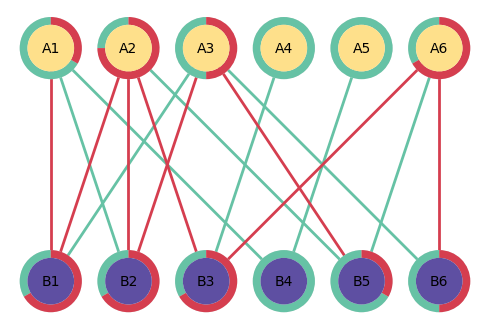

In [6]:
fig, ax = plt.subplots(figsize=(5, 6))
draw_bipartite_graph(data.associations, cluster_a_node_names, cluster_b_node_names, ax)
fig.tight_layout()

In [7]:
pprint(data.get_stats())

{'a': {'ent': array([0.79718602]),
       'num': array([3., 4., 4., 1., 1., 3.]),
       'num_neg': array([1., 3., 2., 0., 0., 2.]),
       'num_pos': array([2., 1., 2., 1., 1., 1.]),
       'r': array([0.66666778, 0.25000187, 0.50000125, 1.        , 1.        ,
       0.33333556])},
 'b': {'ent': array([0.81372672]),
       'num': array([3., 3., 3., 2., 3., 2.]),
       'num_neg': array([2., 2., 2., 0., 1., 1.]),
       'num_pos': array([1., 1., 1., 2., 2., 1.]),
       'r': array([0.33333556, 0.33333556, 0.33333556, 1.        , 0.66666778,
       0.5000025 ])},
 'ent': 0.8054563712830969}


As you can see, in this dataset the number of positive and negative associations is the same; however, it is even more entity-unbalanced.


## Make the Association Data Entity-Balanced

We can use the same method to make our dataset entity-balanced.

First, let's create the `AData` object again.


In [8]:
data = AData(
    associations=associations,
    node_names=[
        cluster_a_node_names,
        cluster_b_node_names,
    ],
)

Now we can use the `balance_data` function with `balance_method="entity-balanced"`.

In [9]:
data.balance_data(
    balance_method="entity-balanced",
    seed=0,  # random seed
    max_iter=1000,  # maximum number of iterations for the simulated annealing algorithm
    delta=0.1,  # parameter for controlling the remove of positive samples. the lower the value, the more positive samples can be removed
    cooling_rate=0.99,  # cooling rate for the simulated annealing algorithm
    initial_temp=10.0,  # initial temperature for the simulated annealing algorithm
    ent_desired=1.0,  # desired entropy for the dataset. 1.0 means completely entity-balanced.
)

Now, as you can see, the dataset is both balanced and entity-balanced.

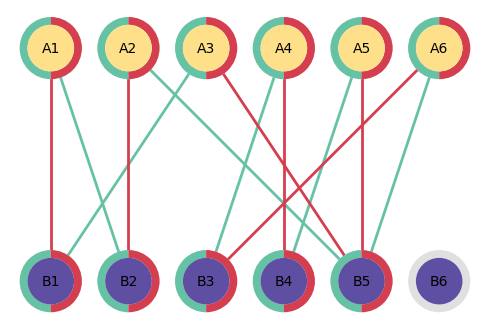

In [10]:
fig, ax = plt.subplots(figsize=(5, 6))
draw_bipartite_graph(data.associations, cluster_a_node_names, cluster_b_node_names, ax)
fig.tight_layout()

In [11]:
pprint(data.get_stats())

{'a': {'ent': array([1.00000443]),
       'num': array([2., 2., 2., 2., 2., 2.]),
       'num_neg': array([1., 1., 1., 1., 1., 1.]),
       'num_pos': array([1., 1., 1., 1., 1., 1.]),
       'r': array([0.5000025, 0.5000025, 0.5000025, 0.5000025, 0.5000025, 0.5000025])},
 'b': {'ent': array([1.00000369]),
       'num': array([2., 2., 2., 2., 4., 0.]),
       'num_neg': array([1., 1., 1., 1., 2., 0.]),
       'num_pos': array([1., 1., 1., 1., 2., 0.]),
       'r': array([0.5000025 , 0.5000025 , 0.5000025 , 0.5000025 , 0.50000125,
       1.        ])},
 'ent': 1.0000040576465614}


### Generating Diverse Datasets with Different Seeds

If we change the `seed`, we can generate different balanced or entity-balanced datasets.

In [12]:
data = AData(
    associations=associations,
    node_names=[
        cluster_a_node_names,
        cluster_b_node_names,
    ],
)

In [13]:
data.balance_data(
    balance_method="entity-balanced",
    negative_ratio=1.0,
    seed=1,
    max_iter=1000,
    delta=0.1,
    cooling_rate=0.99,
    initial_temp=10.0,
    ent_desired=1.0,
)

Here, we set `seed=1`, and with the same dataset and algorithms, we obtained a different entity-balanced dataset.

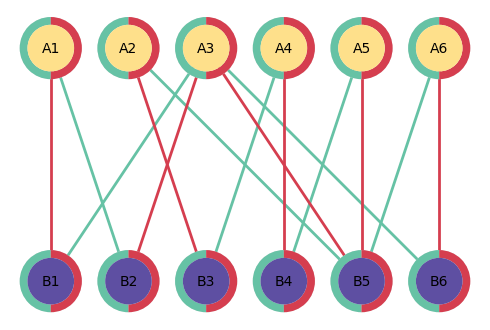

In [14]:
fig, ax = plt.subplots(figsize=(5, 6))
draw_bipartite_graph(data.associations, cluster_a_node_names, cluster_b_node_names, ax)
fig.tight_layout()

In [15]:
pprint(data.get_stats())

{'a': {'ent': array([1.00000379]),
       'num': array([2., 2., 4., 2., 2., 2.]),
       'num_neg': array([1., 1., 2., 1., 1., 1.]),
       'num_pos': array([1., 1., 2., 1., 1., 1.]),
       'r': array([0.5000025 , 0.5000025 , 0.50000125, 0.5000025 , 0.5000025 ,
       0.5000025 ])},
 'b': {'ent': array([1.00000379]),
       'num': array([2., 2., 2., 2., 4., 2.]),
       'num_neg': array([1., 1., 1., 1., 2., 1.]),
       'num_pos': array([1., 1., 1., 1., 2., 1.]),
       'r': array([0.5000025 , 0.5000025 , 0.5000025 , 0.5000025 , 0.50000125,
       0.5000025 ])},
 'ent': 1.0000037941500528}


## Creating Datasets with Different Levels of Entity-Balance

The `ent_desired` parameter of `data.balance_data` allows us to create datasets with different degrees of entity-balance or entity-unbalance.  
Here, we set `ent_desired=0.0` to sample a completely entity-unbalanced dataset from the original dataset.

In [16]:
data = AData(
    associations=associations,
    node_names=[
        cluster_a_node_names,
        cluster_b_node_names,
    ],
)

In [17]:
data.balance_data(
    balance_method="entity-balanced",
    negative_ratio=1.0,
    seed=1,
    max_iter=1000,
    delta=1.0,
    cooling_rate=0.99,
    initial_temp=10.0,
    ent_desired=0.0,  # Changed to 0.0
)

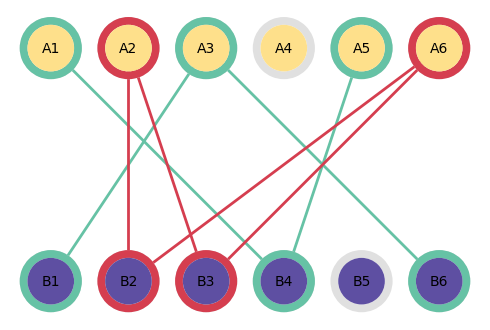

In [18]:
fig, ax = plt.subplots(figsize=(5, 6))
draw_bipartite_graph(data.associations, cluster_a_node_names, cluster_b_node_names, ax)
fig.tight_layout()

In [19]:
pprint(data.get_stats())

{'a': {'ent': array([1.92831466e-05]),
       'num': array([1., 2., 2., 0., 1., 2.]),
       'num_neg': array([0., 2., 0., 0., 0., 2.]),
       'num_pos': array([1., 0., 2., 0., 1., 0.]),
       'r': array([1.000000e+00, 4.999975e-06, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 4.999975e-06])},
 'b': {'ent': array([1.92831466e-05]),
       'num': array([1., 2., 2., 2., 0., 1.]),
       'num_neg': array([0., 2., 2., 0., 0., 0.]),
       'num_pos': array([1., 0., 0., 2., 0., 1.]),
       'r': array([1.000000e+00, 4.999975e-06, 4.999975e-06, 1.000000e+00,
       1.000000e+00, 1.000000e+00])},
 'ent': 1.9283146649854408e-05}


## More than Two Groups in Association Data

It is also possible to specify more than two entity groups.

In [20]:
cluster_a_node_names = ["A1", "A2", "A3", "A4", "A5", "A6"]
cluster_b_node_names = ["B1", "B2", "B3", "B4", "B5", "B6"]
cluster_c_node_names = ["C1", "C2", "C3"]
associations = np.array(  # [index_a, index_b, index_c, positive or negative]
    [
        [0, 1, 0, 1],
        [0, 3, 1, 1],
        [1, 4, 0, 1],
        [2, 0, 1, 1],
        [2, 5, 1, 1],
        [3, 2, 1, 1],
        [4, 3, 0, 1],
        [5, 4, 0, 1],
        [0, 0, 1, 0],
        [1, 0, 1, 0],
        [1, 1, 1, 0],
        [1, 2, 2, 0],
        [2, 1, 2, 0],
        [2, 4, 0, 0],
        [3, 3, 2, 0],
        [4, 4, 2, 0],
        [5, 1, 2, 0],
        [5, 2, 1, 0],
        [5, 5, 2, 0],
    ]
)

data = AData(
    associations=associations,
    node_names=[cluster_a_node_names, cluster_b_node_names, cluster_c_node_names],
)

In [21]:
pprint(data.get_stats())

{'a': {'ent': array([0.90764083]),
       'num': array([3., 4., 4., 2., 2., 4.]),
       'num_neg': array([1., 3., 2., 1., 1., 3.]),
       'num_pos': array([2., 1., 2., 1., 1., 1.]),
       'r': array([0.66666778, 0.25000187, 0.50000125, 0.5000025 , 0.5000025 ,
       0.25000187])},
 'b': {'ent': array([0.92157038]),
       'num': array([3., 4., 3., 3., 4., 2.]),
       'num_neg': array([2., 3., 2., 1., 2., 1.]),
       'num_pos': array([1., 1., 1., 2., 2., 1.]),
       'r': array([0.33333556, 0.25000187, 0.33333556, 0.66666778, 0.50000125,
       0.5000025 ])},
 'c': {'ent': array([0.61103639]),
       'num': array([5., 8., 6.]),
       'num_neg': array([1., 4., 6.]),
       'num_pos': array([4., 4., 0.]),
       'r': array([8.00000400e-01, 5.00000625e-01, 1.66666389e-06])},
 'ent': 0.8134158665699914}
